In [191]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv
/kaggle/input/k/mragpavank/pima-indians-diabetes-database/__results__.html
/kaggle/input/k/mragpavank/pima-indians-diabetes-database/__resultx__.html
/kaggle/input/k/mragpavank/pima-indians-diabetes-database/__notebook__.ipynb
/kaggle/input/k/mragpavank/pima-indians-diabetes-database/__output__.json
/kaggle/input/k/mragpavank/pima-indians-diabetes-database/custom.css


In [192]:
#Adding datasets in a Dataframe
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


**Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction and Age are the factors that are used as a variable to predict the result for diabetes**

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data info shows that there are no any null values. There are 768 rows and 9 columns in total.**

**Sometimes, not every people go and check for all features in the Lab. There may be some features they won't need therefore. It is also necessary to check whether the features has any zero value or not.**

In [194]:

print("Number of zero values in SkinThickness",len(data.loc[data['SkinThickness']== 0]))
print("Number of zero values in Insulin",len(data.loc[data['Insulin']== 0]))
print("Number of zero values in Glucose",len(data.loc[data['Glucose']== 0]))
print("Number of zero values in BMI",len(data.loc[data['BMI']== 0]))
print("Number of zero values in BloodPressure",len(data.loc[data['BloodPressure']== 0]))
print("Number of zero values in Age",len(data.loc[data['Age']== 0]))
print("Number of zero values in Pregnancies",len(data.loc[data['Pregnancies']== 0]))
print("Number of zero values in DiabetesPedigreeFunction",len(data.loc[data['DiabetesPedigreeFunction']== 0]))


Number of zero values in SkinThickness 227
Number of zero values in Insulin 374
Number of zero values in Glucose 5
Number of zero values in BMI 11
Number of zero values in BloodPressure 35
Number of zero values in Age 0
Number of zero values in Pregnancies 111
Number of zero values in DiabetesPedigreeFunction 0


**As expected, we can see many zero values. Therefore after completing correlation matrix, we wil again use feature engineering to replace it with its most efficient value either with mean or something else**

**To identify important variable in the datasets we will use correlation. Higher the correlation means it has direct impact with other variables.**

In [195]:
data.shape

(768, 9)

In [196]:
#correlation
correlation= data.corr()
correlation


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**To see same correlation result in figure, we can use correlation matrix heatmap for more clear view**

<Axes: >

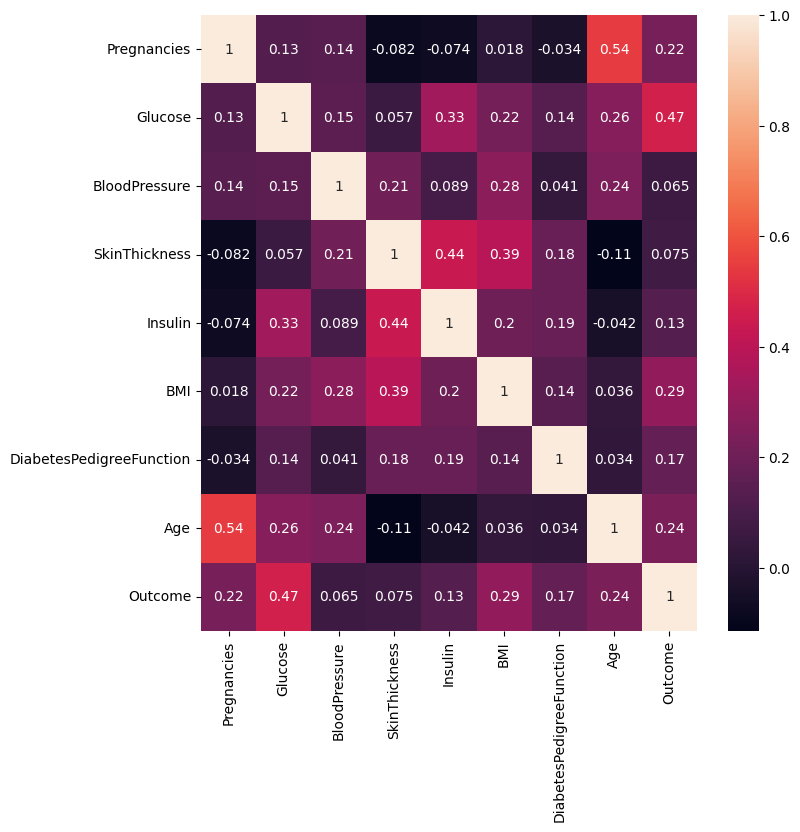

In [197]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

**Interpretation from correlation matrix: We can see that Glucose has higher value in correlation heatmap compared with outcome . It means there will be direct impact of Glucose in outcome for diabetes**

**Now, it's important to identify how the dataset is distributed. Balanced and imbalanced datasets have different characteristics, which will help us choose the appropriate machine learning model.**

In [198]:
without_diabetes=len(data.loc[data['Outcome']== 0])
with_diabetes=len(data.loc[data['Outcome']== 1])
print("Number of ladies with diabetes",with_diabetes)
print("Number of ladies without diabetes",without_diabetes)
print("Percentage of ladies with diabetes",with_diabetes/(with_diabetes+without_diabetes)*100)
print("Percentage of ladies without diabetes",without_diabetes/(with_diabetes+without_diabetes)*100)

Number of ladies with diabetes 268
Number of ladies without diabetes 500
Percentage of ladies with diabetes 34.89583333333333
Percentage of ladies without diabetes 65.10416666666666


**Approx 35% and 65% data shows it is not extremely imbalanced.**

**Training and Testing the Data**

In [199]:
#Training and Testing the datasets
from sklearn.model_selection import train_test_split
feature = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
y = ['Outcome']
X = data[feature].values
Y = data[y].values

In [200]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

**we identified some zero values in our feature datasets. Now, we'll replace these zeros with the mean value using SimpleImputer from the sklearn library, which is specifically designed for handling missing values. SimpleImputer allows us to replace missing values with the mean, median, mode, or most frequent value. Since all the values in our dataset are numerical, using the mean seems appropriate here.**

In [201]:
import sklearn
from sklearn.impute import SimpleImputer
#we will use SimpleImputer where we can directly give mean value 
fill_zero = SimpleImputer(missing_values=0, strategy="mean")
x_train = fill_zero.fit_transform(x_train)
x_test = fill_zero.fit_transform(x_test)  



**Using Random Forest Algorithm**

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
y_train = y_train.ravel()
y_test = y_test.ravel()
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

It is necessary to check the accuracy of model

In [203]:
predict_train_data = random_forest.predict(x_test)

from sklearn import metrics
accuracy_score_without_hypertuning = accuracy_score(y_test, predict_train_data)
print(accuracy_score_without_hypertuning)

0.8116883116883117


****We can use many methods to improve the accuracy of model** **

In [213]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=0)

grid_search.fit(x_train, y_train.ravel())

# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predictions
predict_train_data = best_rf.predict(x_test)

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [214]:
accuracy_score_withrfc = accuracy_score(y_test, predict_train_data)
print(accuracy_score_withrfc)

0.8311688311688312


**In above figure, we have used Random Forest Classifier in GridSearchCV. There is another method named by "XGBoost" as well**

In [215]:
print("Random Forest Accuracy without hyperparameter tuning:", accuracy_score_without_hypertuning)
print("Random Forest Accuracy with GridSearchCV and random forest classifier:", accuracy_score_withrfc)


Random Forest Accuracy without hyperparameter tuning: 0.8116883116883117
Random Forest Accuracy with GridSearchCV and random forest classifier: 0.8311688311688312


****In this way, we can use Random Forest Model to predict diabetes**  **